In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

import tinyDA as tda

In [2]:
b = 1
m = 2
x = np.linspace(0,1)
y_pure = b + m*x

sigma = 0.2
y = y_pure + np.random.normal(scale=sigma, size=x.shape[0])

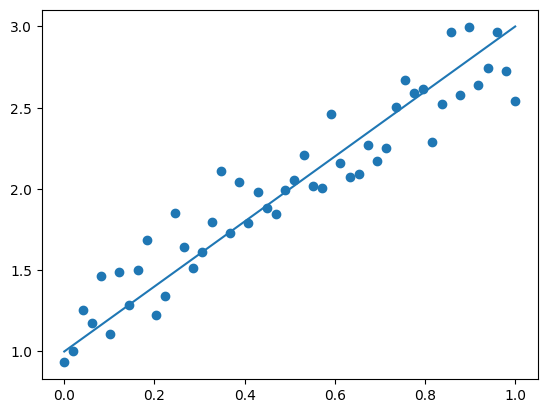

In [3]:
plt.plot(x, y_pure)
plt.scatter(x, y)
plt.show()

In [4]:
mean_prior = np.zeros(2)
cov_prior = np.eye(2)
cov_likelihood = sigma**2*np.eye(x.shape[0])

my_prior = multivariate_normal(mean_prior, cov_prior)
my_loglike = tda.GaussianLogLike(y, cov_likelihood)

In [5]:
# define a model.
def my_model(parameters):
    return parameters[0] + parameters[1]*x

In [6]:
my_posterior = tda.Posterior(my_prior, my_loglike, my_model)

In [7]:
#rwmh_cov = np.eye(2)
#rmwh_scaling = 0.1
#rwmh_adaptive = True
#my_kernel = tda.GaussianRandomWalk(C=rwmh_cov, scaling=rmwh_scaling, adaptive=rwmh_adaptive)

pcn_scaling = 0.1
pcn_adaptive = False
my_kernel = tda.CrankNicolson(scaling=pcn_scaling, adaptive=pcn_adaptive)

#am_cov = np.eye(2)
#am_t0 = 2000
#am_sd = 1
#am_epsilon = 1e-6
#my_kernel = tda.AdaptiveMetropolis(C0=am_cov, t0=am_t0, sd=am_sd, epsilon=am_epsilon)

my_proposal = tda.MultipleTry(my_kernel, 3)

2025-12-15 13:37:07,085	INFO worker.py:1786 -- Started a local Ray instance.


In [8]:
import os
if "CI" in os.environ:
    iterations = 120
    burnin = 20
else:
    iterations = 12000
    burnin = 2000

In [9]:
my_chains = tda.sample(my_posterior, my_proposal, iterations=iterations, n_chains=2)

/home/louisekluge/miniconda3/envs/tda/lib/python3.12/site-packages/tinyDA/sampler.py:137: UserWarning:  MultipleTry proposal is not compatible with parallel sampling. Forcing sequential mode...

  warnings.warn(


Sampling chain 1/2


Running chain, α = 1.00:   0%|          | 0/12000 [00:00<?, ?it/s]

Running chain, α = 0.76: 100%|██████████| 12000/12000 [05:45<00:00, 34.77it/s] 


Sampling chain 2/2


Running chain, α = 0.74: 100%|██████████| 12000/12000 [01:37<00:00, 122.81it/s]


In [10]:
idata = tda.to_inference_data(my_chains, burnin=burnin)

/home/louisekluge/miniconda3/envs/tda/lib/python3.12/site-packages/arviz/data/inference_data.py:157: UserWarning: qoi group is not defined in the InferenceData scheme
  warnings.warn(


In [11]:
import arviz as az

In [12]:
az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x0,1.160,0.098,0.982,1.350,0.003,0.002,814.0,1163.0,1.0
x1,1.682,0.168,1.372,2.003,0.006,0.005,692.0,879.0,1.0


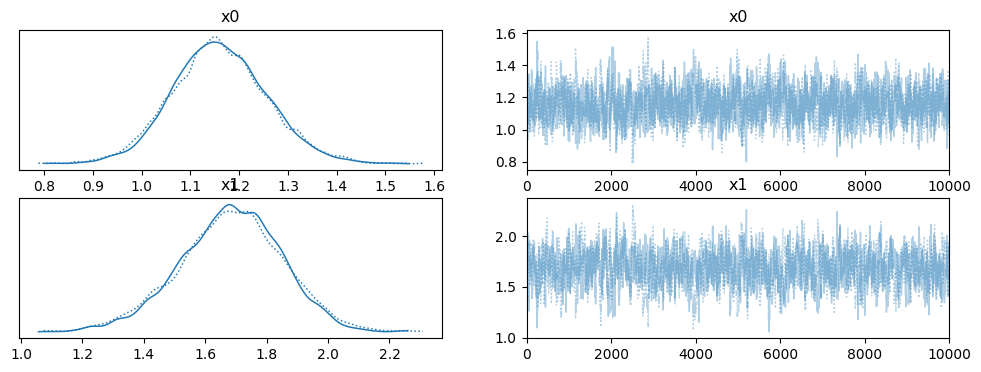

In [13]:
az.plot_trace(idata)
plt.show()